In [16]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso
from sklearn import datasets, ensemble

# to evaluate the model
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

# for Cross-Val
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

index  super_hero_group  tracking  place  tracking_times  crystal_type  \
0  0.125000          0.428571  0.954742    0.0             0.0      0.642857   
1  0.493421          0.285714  0.021300    0.0             0.0      0.964286   
2  0.361842          0.857143  0.127477    0.0             0.0      0.678571   
3  0.105263          0.428571  0.121242    0.0             0.0      0.000000   
4  0.032895          0.714286  0.127832    1.0             0.0      0.642857   

   Unnamed: 7  human_behavior_report  human_measure  crystal_weight  \
0    0.473684               1.000000       0.490741        0.772396   
1    0.842105               0.000000       0.518519        0.698589   
2    0.526316               0.666667       0.425926        0.709611   
3    0.421053               0.333333       0.518519        0.775316   
4    0.578947               1.000000       0.425926        0.554699   

   expected_factor_x  previous_factor_x  first_factor_x  \
0           0.297297           0.356616        0.440217   
1           0.635135           0.548545        0.635870   
2           0.364865           0.494226        0.586957   
3           0.425676           0.532853        0.625000   
4           0.412162           0.515350        0.621196   

   expected_final_factor_x  final_factor_x  previous_adamantium  Unnamed: 17  \
0                 0.245455        0.558046             0.045111     0.440217   
1                 0.590909        0.709157             0.473206     0.635870   
2                 0.645455        0.730472             0.458068     0.586957   
3                 0.509091        0.743229             0.061762     0.625000   
4                 0.454545        0.670621             0.029216     0.621196   

   etherium_before_start  chemical_x  raw_kryptonite     argon  pure_seastone  \
0               0.384121    0.754144        0.100159  0.163799       0.579159   
1               0.422208    0.810842        0.100159  0.140086       0.745054   
2               0.384121    0.587025        0.100159  0.000000       0.759387   
3               0.384121    0.658251        0.100159  0.000000       0.745955   
4               0.384121    0.795842        0.035240  0.127913       0.644752   

   crystal_supergroup     Cycle    groups  diff_subprocess1  diff_expected  \
0                 0.0  0.666667  0.716216          0.257143       0.042747   
1                 1.0  0.333333  0.878378          0.352381       0.035039   
2                 0.0  0.333333  0.540541          0.104762       0.018220   
3                 0.0  0.666667  0.000000          0.152381       0.031535   
4                 0.0  0.666667  0.837838          0.333333       0.025929   

   diff_process  year_when  month_when  day_when  \
0      0.479339        0.5    0.818182  0.700000   
1      0.404959        0.0    0.454545  0.966667   
2      0.148760        0.5    0.545455  0.966667   
3      0.190083        0.5    0.818182  0.200000   
4      0.388430        0.5    0.000000  0.233333   

   year_start_critical_subprocess1  month_start_critical_subprocess1  \
0                         0.500000                          0.818182   
1                         0.000000                          0.454545   
2                         0.363801                          0.480837   
3                         0.363801                          0.480837   
4                         0.500000                          0.000000   

   day_start_critical_subprocess1  hour_start_critical_subprocess1  \
0                        0.700000                         0.347826   
1                        0.966667                         0.086957   
2                        0.474836                         0.491857   
3                        0.474836                         0.491857   
4                        0.233333                         0.391304   

   minute_start_critical_subprocess1  second_start_critical_subprocess1  \
0                           0.406780                            

In [3]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

target
0  3.547049
1  4.852030
2  4.795689
3  2.982660
4  2.214880

In [4]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['index',
 'super_hero_group',
 'tracking',
 'place',
 'crystal_type',
 'human_behavior_report',
 'human_measure',
 'argon',
 'crystal_supergroup',
 'Cycle',
 'groups',
 'year_when',
 'day_when',
 'year_start_critical_subprocess1',
 'month_start_critical_subprocess1',
 'minute_start_critical_subprocess1',
 'year_opened',
 'month_opened',
 'hour_opened',
 'minute_opened',
 'etherium_before_start_na',
 'argon_na',
 'pure_seastone_na',
 'diff_subprocess1_na',
 'year_reported_on_tower_na',
 'year_opened_na']

In [5]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

# Regularised linear regression: Lasso

In [6]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.001, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [7]:
# evaluate the model:

# remember that we log transformed the target

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original target values

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()


train mse: 1431
train rmse: 37
train r2: 0.5530172040993442

test mse: 1598
test rmse: 39
test r2: 0.5256269624393355

Average target value:  90


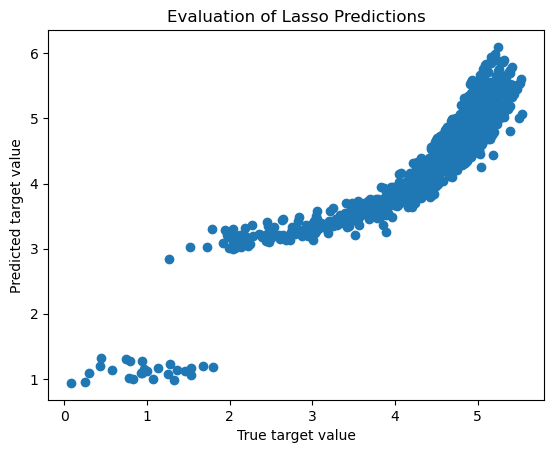

In [15]:
# show real value vs. predicted as plot
plt.scatter(y_test, pred)
plt.xlabel('True target value')
plt.ylabel('Predicted target value')
plt.title('Evaluation of Lasso Predictions')
plt.show()

We can see that Lasso performs really poorly with an R2 just above 0.5 and in the plot you can clearly see that this linear model doesn't capture the highly nonlinear pattern in the data. Therefore we try a nonlinear model: Gradient boosting.

# GradientBoosting

We first use the default parameters and will later do Cross-Validation together with Hyperparameter tuning to find the best parameter set.

In [9]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "verbose": 5
}

y_train = y_train.values.ravel()

In [10]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

      Iter       Train Loss   Remaining Time 
         1           0.8759           11.34s
         2           0.8594            9.61s
         3           0.8431            8.84s
         4           0.8272            8.50s
         5           0.8116            8.30s
         6           0.7963            8.12s
         7           0.7813            8.01s
         8           0.7666            7.90s
         9           0.7522            7.81s
        10           0.7381            7.74s
        11           0.7242            7.68s
        12           0.7106            7.61s
        13           0.6973            7.57s
        14           0.6843            7.54s
        15           0.6715            7.52s
        16           0.6590            7.49s
        17           0.6467            7.45s
        18           0.6346            7.41s
        19           0.6228            7.38s
        20           0.6112            7.35s
        21           0.5999            7.32s
        2

In [12]:
# evaluate the model:

# remember that we log transformed the target

# In order to get the true performance of the Gradient Boosting
# we need to transform both the target and the predictions
# back to the original target values

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
y_pred_train = reg.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(y_pred_train), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(y_pred_train))))
print()

# make predictions for test set
y_pred_test = reg.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(y_pred_test), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_test))))
print()


train mse: 157
train rmse: 12
train r2: 0.9507978785233118

test mse: 162
test rmse: 12
test r2: 0.9518584998003601



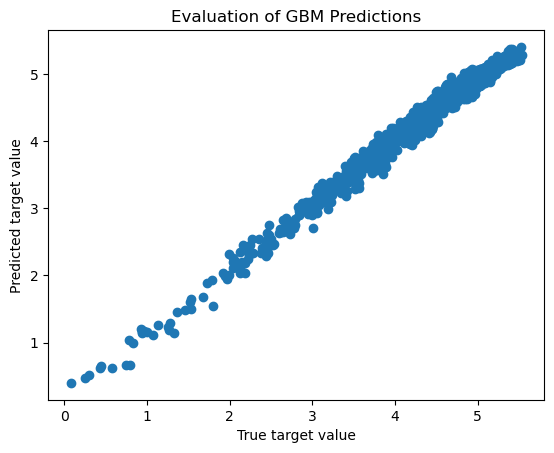

In [14]:
# show real value vs. predicted as plot
plt.scatter(y_test, y_pred_test)
plt.xlabel('True target value')
plt.ylabel('Predicted target value')
plt.title('Evaluation of GBM Predictions')
plt.show()

The R2 score looks way better compared to Lasso! Also the MSE and RMSE improved a lot.

# Cross-Validation & Hyperparameter tuning

In [33]:
# Cross Validation (attention the MSE and RMSE are lower than above because they are log-transformed)
nr_fold = 5
reg = ensemble.GradientBoostingRegressor(**params)
scoring_measures = {"r2": "r2", "mse": "neg_mean_squared_error"}
cross_val = cross_validate(estimator=reg, X=X_train, y=y_train, cv=nr_fold, scoring=scoring_measures, return_train_score=True)
scores_df = pd.DataFrame.from_dict(cross_val)


      Iter       Train Loss   Remaining Time 
         1           0.8666            6.02s
         2           0.8502            5.97s
         3           0.8341            6.00s
         4           0.8184            6.04s
         5           0.8029            6.05s
         6           0.7878            6.05s
         7           0.7729            6.08s
         8           0.7584            6.09s
         9           0.7442            6.10s
        10           0.7302            6.08s
        11           0.7165            6.05s
        12           0.7031            6.01s
        13           0.6899            5.99s
        14           0.6770            5.98s
        15           0.6644            5.95s
        16           0.6520            5.92s
        17           0.6398            5.91s
        18           0.6279            5.89s
        19           0.6162            5.88s
        20           0.6048            5.87s
        21           0.5935            5.86s
        2

In [32]:
scores_df

fit_time  score_time   test_r2  train_r2  test_rmse  train_rmse  test_mse  \
0  5.847009    0.017177  0.983270  0.984247  -0.124802   -0.117961 -0.015576   
1  5.888377    0.015846  0.982240  0.984054  -0.126489   -0.119172 -0.016000   
2  5.841162    0.016242  0.981654  0.984256  -0.124539   -0.119323 -0.015510   
3  5.909979    0.016780  0.982711  0.984494  -0.123235   -0.117897 -0.015187   
4  5.884211    0.016084  0.982814  0.984198  -0.124792   -0.118552 -0.015573   

   train_mse  
0  -0.013915  
1  -0.014202  
2  -0.014238  
3  -0.013900  
4  -0.014055

In [38]:
# MSE from cross val:
print('Mean mse-score of training scores in cross validation: ' + str(round(abs(scores_df['train_mse'].mean()), 3)))
print('Mean mse-score of test scores in cross validation: ' + str(round(abs(scores_df['test_mse'].mean()), 3)))

# r2 score from cross val:
print('Mean r2-score of training scores in cross validation: ' + str(round(abs(scores_df['train_r2'].mean()), 3)))
print('Mean r2-score of test scores in cross validation: ' + str(round(abs(scores_df['test_r2'].mean()), 3)))


Mean mse-score of training scores in cross validation: 0.014
Mean mse-score of test scores in cross validation: 0.016
mse-score on unseen data: 0.14
Mean r2-score of training scores in cross validation: 0.984
Mean r2-score of test scores in cross validation: 0.983
r2-score on unseen data: 0.858


In [46]:
# Random search
parameters = {
    "n_estimators":[100, 300, 500],
    "max_depth":[2,4,6],
    "min_samples_split":[5, 10],
    "learning_rate":[0.1, 0.01, 0.001],
    "loss": ["squared_error"]
}


hyperparam_tuning = GridSearchCV(estimator=reg, param_grid=parameters, scoring='r2', cv=nr_fold, return_train_score=True) 
hyperparam_tuning.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7373            0.65s
         2           0.6181            0.64s
         3           0.5194            0.64s
         4           0.4377            0.64s
         5           0.3706            0.63s
         6           0.3145            0.62s
         7           0.2690            0.61s
         8           0.2309            0.60s
         9           0.1989            0.60s
        10           0.1729            0.59s
        11           0.1507            0.58s
        12           0.1325            0.58s
        13           0.1173            0.57s
        14           0.1046            0.56s
        15           0.0940            0.55s
        16           0.0852            0.54s
        17           0.0777            0.53s
        18           0.0714            0.53s
        19           0.0662            0.52s
        20           0.0616            0.51s
        21           0.0576            0.50s
        2

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=4,
                                                 min_samples_split=5,
                                                 n_estimators=500, verbose=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['squared_error'], 'max_depth': [2, 4, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='r2')

In [58]:
# summarize the best score and configuration
print("Best: %f using %s" % (hyperparam_tuning.best_score_, hyperparam_tuning.best_params_))

# summarize all scores that were evaluated
means = hyperparam_tuning.cv_results_['mean_test_score']
stds = hyperparam_tuning.cv_results_['std_test_score']
params = hyperparam_tuning.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999413 using {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 500}
0.979322 (0.000489) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.993647 (0.000165) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 300}
0.997231 (0.000115) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 500}
0.979322 (0.000489) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.993647 (0.000165) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 300}
0.997230 (0.000113) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 500}
0.994423 (0.000235) with: {'learning_rate': 0.1, 'loss': 

We improved the model performance substantially with the new parameter set!

In [60]:
final_params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    "loss": "squared_error",
    "verbose": 5
}

reg = ensemble.GradientBoostingRegressor(**final_params)
reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7314            7.92s
         2           0.6004            7.81s
         3           0.4940            7.72s
         4           0.4076            7.62s
         5           0.3373            7.61s
         6           0.2801            7.57s
         7           0.2337            7.51s
         8           0.1959            7.48s
         9           0.1652            7.45s
        10           0.1403            7.41s
        11           0.1199            7.38s
        12           0.1033            7.35s
        13           0.0897            7.32s
        14           0.0786            7.30s
        15           0.0693            7.30s
        16           0.0619            7.29s
        17           0.0558            7.27s
        18           0.0506            7.25s
        19           0.0463            7.23s
        20           0.0428            7.20s
        21           0.0397            7.19s
        2

GradientBoostingRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                          verbose=5)

# Feature Importance

In [62]:
reg.feature_importances_

array([9.56332114e-01, 1.23803045e-04, 1.33532307e-03, 5.70411908e-04,
       2.03798762e-04, 2.33380558e-06, 2.05814865e-05, 1.63786250e-05,
       3.98832143e-05, 1.52167273e-03, 2.82457303e-02, 1.97238155e-03,
       5.44269530e-03, 1.11216512e-05, 2.98683535e-04, 3.83690594e-05,
       8.55167141e-04, 2.46879112e-03, 6.30250101e-06, 7.50732938e-06,
       6.90600340e-05, 3.41298087e-04, 1.14465823e-06, 8.04661777e-07,
       3.88646821e-06, 7.07558937e-05])

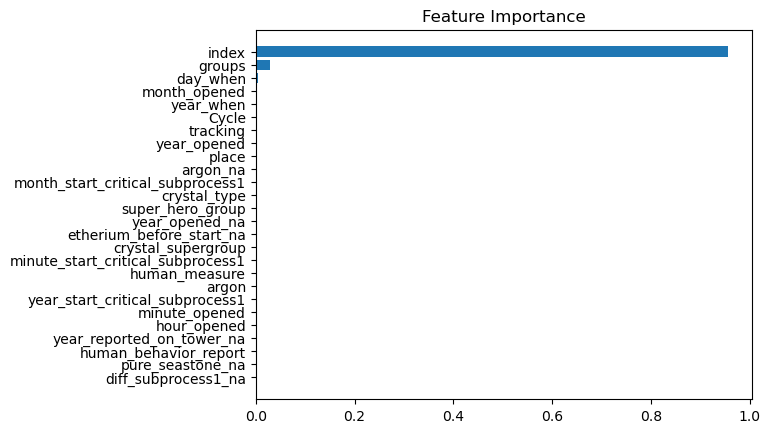

In [76]:
# Plot feature importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

As expected the index and the groups variable are the most important, beacuse the target increases with increasing index